In [159]:
# IMPORTING MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [6]:
# READING THE DATA
data=pd.read_csv('datasets_19_420_Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
# SHAPE OF THE DATA
data.shape

(150, 6)

In [16]:
# GETTING DUMMY VALUES FOR STRING INPUT
cols=['Species']
new_data=pd.get_dummies(data,cols)


In [20]:
# DISPLAY THE DATA
new_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
5,6,5.4,3.9,1.7,0.4,1,0,0
6,7,4.6,3.4,1.4,0.3,1,0,0
7,8,5.0,3.4,1.5,0.2,1,0,0
8,9,4.4,2.9,1.4,0.2,1,0,0
9,10,4.9,3.1,1.5,0.1,1,0,0


In [35]:
# MERGING THE DUMMY VALUES TO ONE COLUMN
setosa=new_data['Species_Iris-setosa']
versi=new_data['Species_Iris-versicolor']
virg=new_data['Species_Iris-virginica']
lst=[]
for i in range(150):
    a=setosa[i]
    b=versi[i]
    c=virg[i]
    if a==1 and b==0 and c==0:
        lst.append(1)
    elif a==0 and b==1 and c==0:
        lst.append(2)
    elif a==0 and b==0 and c==1:
        lst.append(3)
print(lst)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [36]:
# INSERTING THE NEW COLUMN
data.insert(6,'Output',lst)
data=data.drop(columns=['Id'])

In [44]:
# DIAPLAY THE DATA
data.head(100)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Output
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,2
96,5.7,2.9,4.2,1.3,Iris-versicolor,2
97,6.2,2.9,4.3,1.3,Iris-versicolor,2
98,5.1,2.5,3.0,1.1,Iris-versicolor,2


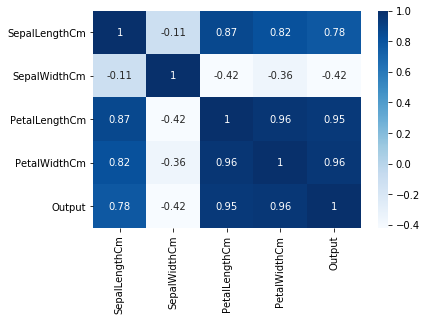

In [45]:
# ANALYSING THE CORRELATION BETW THE INPUT FEATURES
sb.heatmap(data.corr(),cmap='Blues',annot=True)

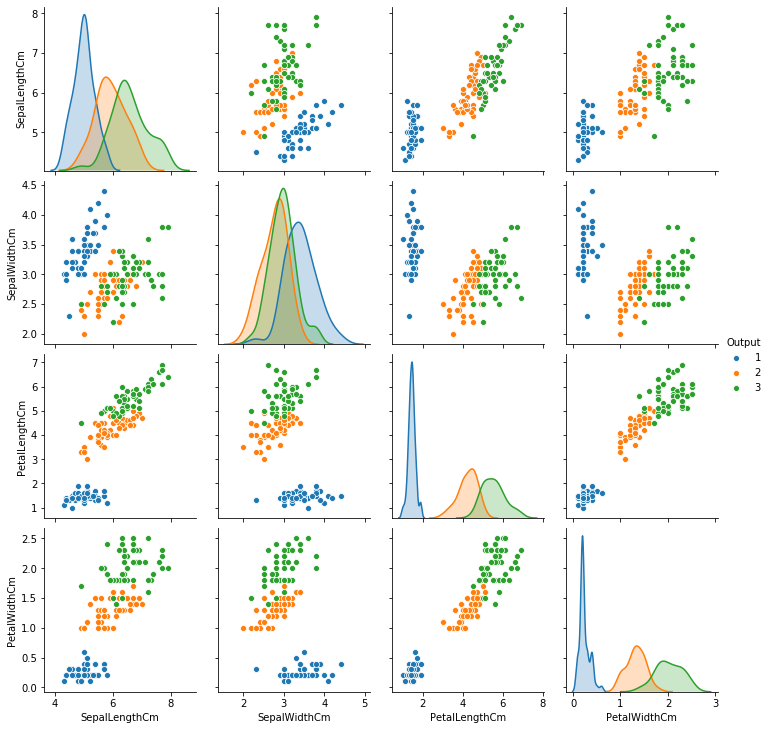

In [49]:
# PLOTING THE PAIR PLOT
sb.pairplot(data,hue='Output')

In [126]:
# DATAFRAME TO ARRAYA
x=np.asanyarray(data[['PetalWidthCm','PetalLengthCm']])
y=np.asanyarray(data[['Output']])
y=y.ravel()
print(x.shape,y.shape,sep='\n')

(150, 2)
(150,)


In [127]:
# TRAIN AND TEST SPLIT DATASET
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [160]:
# TRAIN THE MODEL
svm=LinearSVC(C=1,random_state=0)
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test)*100)

94.0


In [161]:
# PREPARATION OF THE GRID
arr1=np.arange(x[:,0].min()-1,x[:,0].max()+1,0.01)
arr2=np.arange(x[:,1].min()-1,x[:,1].max()+1,0.01)
xx,yy=np.meshgrid(arr1,arr2)
print(xx.shape,yy.shape,sep='\n')
print(790*440)

(790, 440)
(790, 440)
347600


In [162]:
# CLASSIFYING EACH POINT ON THE GRID
input_array=np.array([xx.ravel(),yy.ravel()]).T
labels=svm.predict(input_array)


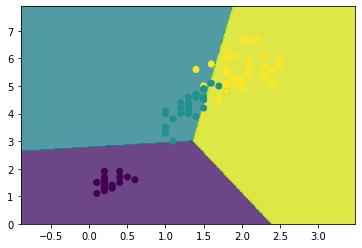

In [163]:
# PLOT THE OUTPUT DECISION BOUNDARY
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)